# Import required libraries

In [752]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings


# Remove Warnings

In [753]:
warnings.filterwarnings('ignore')

# Load Dataset

In [754]:
df=pd.read_csv(r'C:\Users\Preeti\Desktop\customer_churn_large_dataset.csv')

In [755]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


# First of all, drop Name coloum as it is no use

In [756]:
df.drop('Name',axis='columns' , inplace=True)

In [757]:
df.dtypes

CustomerID                      int64
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [758]:
df.drop('Location',axis='columns' , inplace=True)

In [759]:
df.dtypes

CustomerID                      int64
Age                             int64
Gender                         object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

#  check gender is a object or not

In [760]:
df.Gender.values

array(['Male', 'Female', 'Female', ..., 'Male', 'Female', 'Female'],
      dtype=object)

# Gender is a string .Lets convert it to numbers

In [761]:
df['Gender'].replace({'Female':1, 'Male':0}, inplace= True)

In [762]:
df.Gender.unique()

array([0, 1], dtype=int64)

 # Apply Exploratory Data Analysis(Used to understand the dataset is being used)

# First five row data)Records

In [763]:
df.head()

,CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,0,17,73.36,236,0
1,2,62,1,1,48.76,172,0
2,3,24,1,5,85.47,460,0
3,4,36,1,3,97.94,297,1
4,5,46,1,19,58.14,266,0


# Display total number of columns and rows 

In [764]:
df.shape

(100000, 7)

# Information to the dataset

In [765]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Age                         100000 non-null  int64  
 2   Gender                      100000 non-null  int64  
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 5.3 MB


# check null values


In [766]:
df.isnull().sum()

CustomerID                    0
Age                           0
Gender                        0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

# Summary of the dataset

In [767]:
df.describe()

,CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,0.502160,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,0.499998,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,0.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,0.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,1.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,1.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,1.000000,24.000000,100.000000,500.000000,1.000000


In [768]:
df.Total_Usage_GB.values

array([236, 172, 460, ..., 251, 434, 173], dtype=int64)

# Data Visulalization
# Now,visualize that how much have churn or how much have not churn

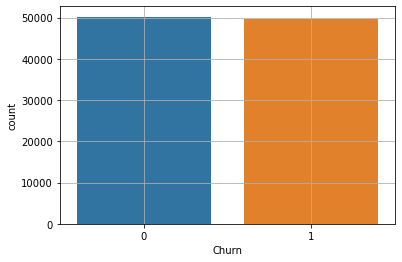

In [769]:
sb.countplot(x=df['Churn'])
plt.grid(True)

# Count outcome that how much have churn or how much have not churn

In [770]:
df['Churn'].value_counts()


0    50221
1    49779
Name: Churn, dtype: int64

# Unique value of outcome


In [771]:
df['Churn'].unique()

array([0, 1], dtype=int64)

# Histrograms

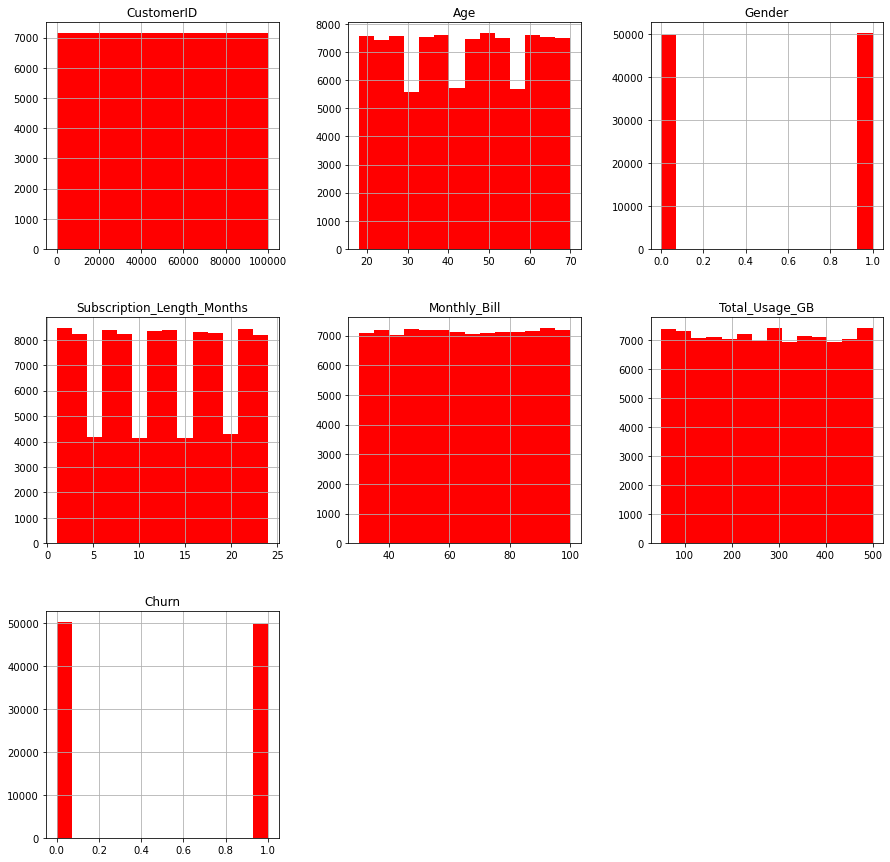

In [772]:
df.hist(bins =14,color="r",figsize=(15,15))
plt.show()

# Scatter plot matrix(coo-relation matrix)


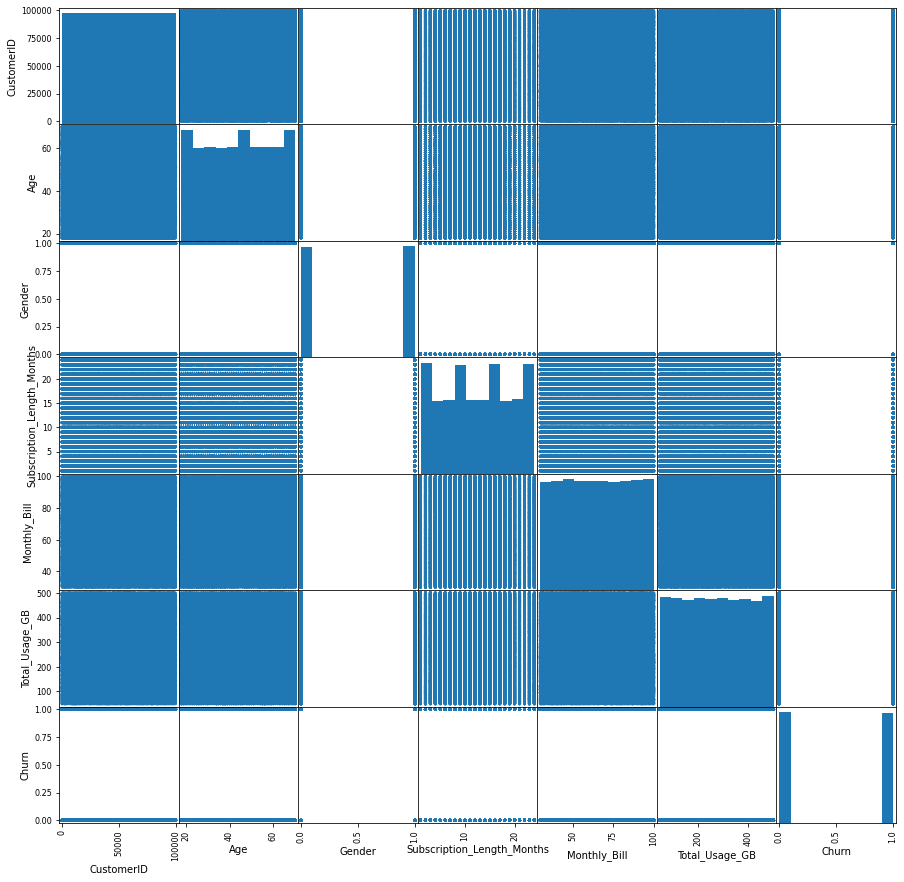

In [773]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(15,15))
plt.show()

# Co-relationship analysis

<AxesSubplot:>

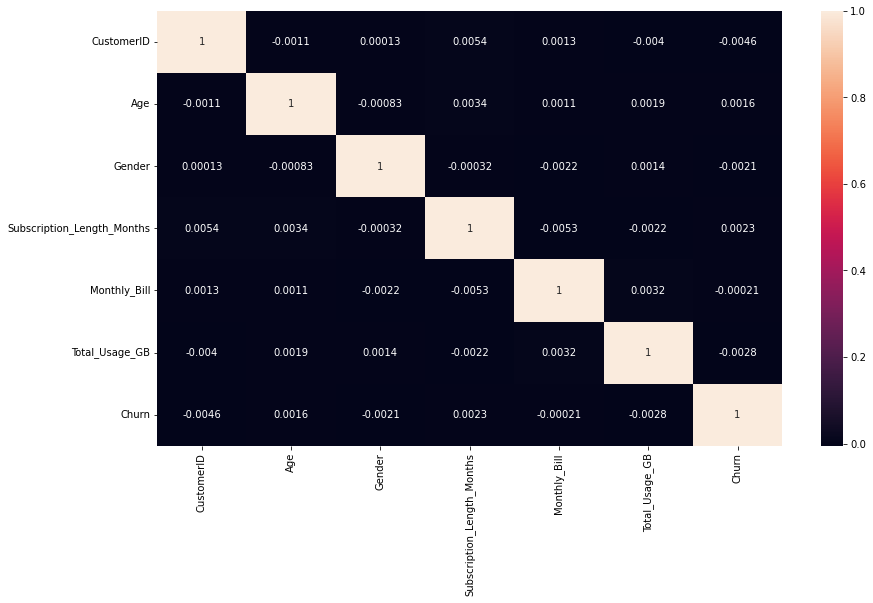

In [774]:
plt.figure(figsize=(14,8))
sb.heatmap(df.corr(), annot= True)

# Check OUtliers

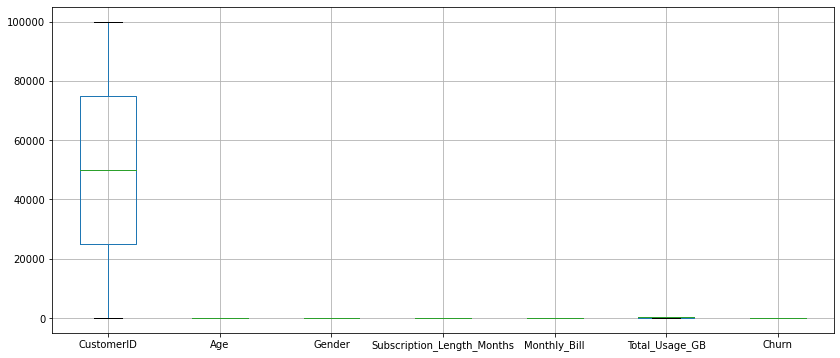

In [775]:
df.boxplot(figsize=(14,6))
plt.show()

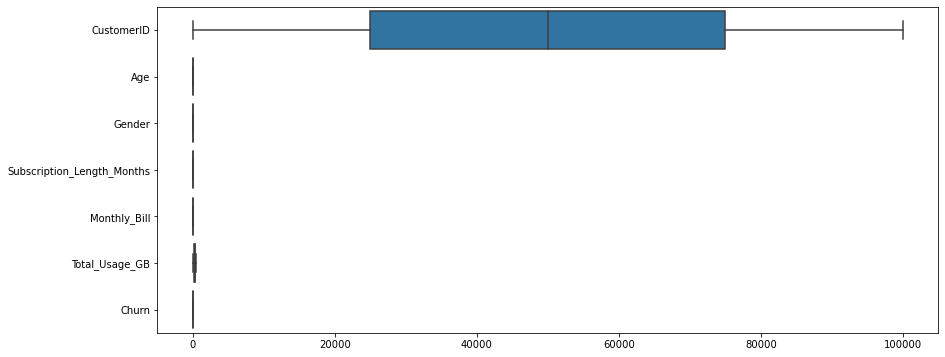

In [776]:
plt.figure(figsize=(14,6))
sb.boxplot(data=df,orient='h')
plt.show()

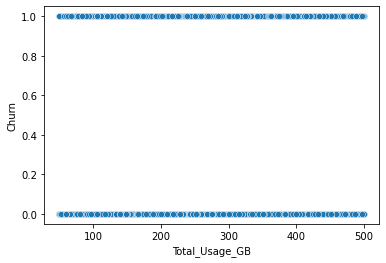

In [777]:
sb.scatterplot(x=df['Total_Usage_GB'],y=df['Churn'])
plt.show()

# Split data into dependent 'Y' and independent 'X' features

In [778]:
X= df.iloc[:,0:9].values
print(X,'\n\n')

[[1.0000e+00 6.3000e+01 0.0000e+00 ... 7.3360e+01 2.3600e+02 0.0000e+00]
 [2.0000e+00 6.2000e+01 1.0000e+00 ... 4.8760e+01 1.7200e+02 0.0000e+00]
 [3.0000e+00 2.4000e+01 1.0000e+00 ... 8.5470e+01 4.6000e+02 0.0000e+00]
 ...
 [9.9998e+04 6.4000e+01 0.0000e+00 ... 9.6110e+01 2.5100e+02 1.0000e+00]
 [9.9999e+04 5.1000e+01 1.0000e+00 ... 4.9250e+01 4.3400e+02 1.0000e+00]
 [1.0000e+05 2.7000e+01 1.0000e+00 ... 7.6570e+01 1.7300e+02 1.0000e+00]] 




In [779]:
Y= df.iloc[:,-1].values
print(Y,'n\n')

[0 0 0 ... 1 1 1] n



In [780]:
X=df.drop('Churn',axis=1)
Y=df['Churn']

# Now data with outlier

In [781]:
X.describe()

,CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,0.502160,12.490100,65.053197,274.393650
std,28867.657797,15.280283,0.499998,6.926461,20.230696,130.463063
min,1.000000,18.000000,0.000000,1.000000,30.000000,50.000000
25%,25000.750000,31.000000,0.000000,6.000000,47.540000,161.000000
50%,50000.500000,44.000000,1.000000,12.000000,65.010000,274.000000
75%,75000.250000,57.000000,1.000000,19.000000,82.640000,387.000000
max,100000.000000,70.000000,1.000000,24.000000,100.000000,500.000000


In [782]:
X

,CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
0,1,63,0,17,73.36,236
1,2,62,1,1,48.76,172
2,3,24,1,5,85.47,460
3,4,36,1,3,97.94,297
4,5,46,1,19,58.14,266
...,...,...,...,...,...,...
99995,99996,33,0,23,55.13,226
99996,99997,62,1,19,61.65,351
99997,99998,64,0,17,96.11,251
99998,99999,51,1,20,49.25,434


In [783]:
Y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

# Splitting of data for training and testing

In [784]:
from sklearn.model_selection import train_test_split


In [785]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3,random_state=6)


In [786]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((70000, 6), (30000, 6), (70000,), (30000,))

In [787]:
Y_train.value_counts()

1    35022
0    34978
Name: Churn, dtype: int64

In [788]:
X_train

,CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB
32458,32459,57,0,14,44.25,229
92042,92043,39,0,7,79.50,193
30803,30804,68,1,4,40.21,442
99733,99734,33,0,2,54.17,166
5637,5638,68,0,13,38.42,332
...,...,...,...,...,...,...
41295,41296,41,1,16,49.00,347
64877,64878,26,1,20,66.95,293
4714,4715,31,0,4,34.69,98
41187,41188,44,0,11,31.22,164


In [789]:
Y_train

32458    1
92042    1
30803    1
99733    0
5637     0
        ..
41295    1
64877    0
4714     0
41187    0
31626    0
Name: Churn, Length: 70000, dtype: int64

# Feature Scaling


In [790]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [791]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [792]:
X_train_std

array([[-0.60878618,  0.84906463, -1.00461063,  0.22307856, -1.02707384,
        -0.3473398 ],
       [ 1.45120029, -0.32912167, -1.00461063, -0.78725966,  0.71615884,
        -0.62291067],
       [-0.66600419,  1.56906737,  0.99541053, -1.22026176, -1.22686562,
         1.28312117],
       ...,
       [-1.56797429, -0.85276002, -1.00461063, -1.22026176, -1.49984844,
        -1.35011157],
       [-0.3070001 , -0.0018477 , -1.00461063, -0.20992354, -1.67145177,
        -0.84489831],
       [-0.63755076,  1.56906737, -1.00461063,  1.37775081,  0.0381526 ,
         0.52530128]])

# Using Random Forest Algorithm

In [793]:
from sklearn.ensemble import RandomForestClassifier

In [794]:
rf=RandomForestClassifier()

# Fit the model with training data

In [795]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [796]:
X_test.shape

(30000, 6)

# Predictions and Evaluations


In [797]:
Y_pred = rf.predict(X_test)

In [798]:
Y_pred.shape

(30000,)

# Check Train Score, test score and Accuracy of random forest

In [799]:
from sklearn.metrics import accuracy_score

In [800]:
rf.score(X_train,Y_train)*100


100.0

In [801]:
rf.score(X_test,Y_test)*100

50.22666666666667

In [802]:
accuracy_score(Y_test,Y_pred)*100


50.22666666666667

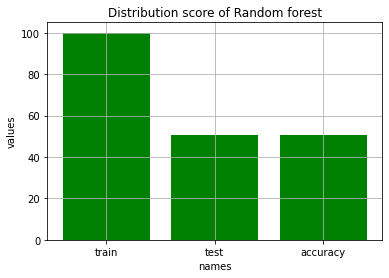

In [803]:
score={"train":100.0,"test":50.516666666666666,"accuracy":50.516666666666666}
names=list(score.keys())
values=list(score.values())
plt.bar(names,values,color='g')
plt.title("Distribution score of Random forest")
plt.xlabel("names")
plt.ylabel("values")
plt.grid(True)
plt.show()

# Create confusion matrix and Classification report

In [804]:
from sklearn.metrics import classification_report, confusion_matrix

In [805]:
confusion_matrix(Y_test, Y_pred)

array([[7979, 7264],
       [7668, 7089]], dtype=int64)

<AxesSubplot:>

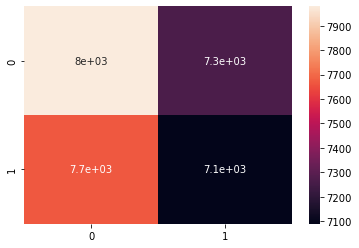

In [806]:
sb.heatmap(confusion_matrix(Y_test,Y_pred), annot=True)

In [807]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.51      0.52      0.52     15243
           1       0.49      0.48      0.49     14757

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [808]:
Y_test.shape

(30000,)

# API Deployment

In [809]:
import pickle
filename = 'rf_model.sav'

In [810]:
filename = 'rf_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [811]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.5022666666666666


In [812]:
import joblib

In [813]:
joblib.dump(df,'rf_scaler.pkl')

['rf_scaler.pkl']

In [814]:
df.head(1)

,CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,0,17,73.36,236,0


In [815]:
rf_input = {    'CustomerID':1,
                 'Age':63,
                 'Gender':0,
                 'Subscription_Length_Months':17,
                 'Monthly_Bill':73.36,
                 'Total_Usage_GB':236}

In [816]:
import pickle

rf_Model = pickle.load(open(filename, 'rb'))

def return_prediction(model,sample_json):
    
   
    CustomerID = sample_json['CustomerID']
    Age = sample_json['Age']
    Gender = sample_json['Gender']
    Subscription_Length_Months = sample_json['Subscription_Length_Months']
    Monthly_Bill = sample_json['Monthly_Bill']
    Total_Usage_GB = sample_json['Total_Usage_GB']
   
    
    input_data= [[CustomerID,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB]]
    
    class_ind = rf_Model.predict(input_data)
    
    return class_ind

In [817]:
return_prediction(rf_Model, rf_input)

array([0], dtype=int64)